Author: Tamanna


# Motivation

In this project, we will be looking at mutation data of Neuroblastoma patients. Neuroblastoma (NBL) is a cancer of the sympathetic nervous system. 

We will be looking at TARGET data to identify risk-associated mutations.

In [ ]:
import pandas as pd

# Mount Google Drive

In [ ]:
from google.colab import drive

# The following command will prompt a URL for you to click and obtain the
# authorization code

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install --upgrade pip
!pip install --upgrade setuptools wheel
!pip install --upgrade "mxnet<2.0.0"
!pip install autogluon

In [ ]:
# Set data file location

from pathlib import Path

DATA = Path("/content/drive/My Drive/2022 ECBM E4060/data")

## PART 1

We load the MAF (mutation annotated format) file

In [ ]:
maf_filename= "TARGET_NBL_WXS_somatic_verified.maf.txt"
maf = pd.read_csv(DATA / maf_filename, sep="\t")
maf.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,...,CGC_Tumor_Types_Germline,CGC_Other_Diseases,DNARepairGenes_Role,FamilialCancerDatabase_Syndromes,MUTSIG_Published_Results,OREGANNO_ID,OREGANNO_Values,PolyPhen,SIFT,RNAseq
0,ABL2,27,broadinstitute.org,37,1,179077416,179077416,+,Missense_Mutation,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,possibly_damaging(0.609),tolerated(0.24),RNAseq_support
1,ALK,238,broadinstitute.org,37,2,29445213,29445213,+,Missense_Mutation,SNP,...,neuroblastoma,NaN,NaN,Neuroblastoma_Familial_Clustering_of|Congenita...,NaN,NaN,NaN,probably_damaging(0.99),deleterious(0),NaN
2,ALK,238,broadinstitute.org,37,2,29443697,29443697,+,Missense_Mutation,SNP,...,neuroblastoma,NaN,NaN,Neuroblastoma_Familial_Clustering_of|Congenita...,NaN,NaN,NaN,possibly_damaging(0.748),deleterious(0),NaN
3,ALK,238,broadinstitute.org,37,2,29443697,29443697,+,Missense_Mutation,SNP,...,neuroblastoma,NaN,NaN,Neuroblastoma_Familial_Clustering_of|Congenita...,NaN,NaN,NaN,benign(0.082),deleterious(0.02),NaN
4,ALK,238,broadinstitute.org,37,2,29443696,29443696,+,Missense_Mutation,SNP,...,neuroblastoma,NaN,NaN,Neuroblastoma_Familial_Clustering_of|Congenita...,NaN,NaN,NaN,probably_damaging(0.993),deleterious(0),NaN


In [ ]:
maf.shape

(177, 77)

In [ ]:
maf.Tumor_Sample_Barcode.nunique()

103

### the most mutated gene in the data set

The most mutated gene in the dataset is the ALK gene.

According to medline, ALK gene mutation is associated with neuroblastoma.
https://medlineplus.gov/genetics/gene/alk/#conditions


In [ ]:
#group the mutations by genes and count unique samples
mutation_frequency = maf.groupby("Hugo_Symbol")["Case_USI"].nunique().reset_index()

mutation_frequency.sort_values("Case_USI", ascending=False, inplace=True)

mutation_frequency.head(10)

,Hugo_Symbol,Case_USI
1,ALK,19
90,PTPN11,6
5,ATRX,6
103,SPTA1,5
84,PMFBP1,4
65,MYCN,3
67,NCAN,3
43,FANCM,3
26,COL6A6,3
101,SPHKAP,3


The most mutated gene in the dataset id ALK. 19 patients have a mutation in this gene.

### the most prevalent mutation
the mutation observed in the most number of patients.

(unique mutation defined the same as unique variant)

Here I identify unique mutation by looking at the field "Genome_Change."
This field includes the chromosome #, the position, and the nucleotide change.

In [ ]:
maf.Genome_Change.head()

0    g.chr1:179077416G>C
1     g.chr2:29445213A>T
2     g.chr2:29443697A>T
3     g.chr2:29443697A>G
4     g.chr2:29443696A>C
Name: Genome_Change, dtype: object

In [ ]:
mutation_comb= maf.groupby(['Genome_Change'])["Case_USI"].nunique().reset_index()
mutation_comb.sort_values("Case_USI", ascending=False, inplace=True)

mutation_comb.head(10)

,Genome_Change,Case_USI
94,g.chr2:29432664C>T,7
97,g.chr2:29443695G>T,5
83,g.chr2:16082317C>T,3
98,g.chr2:29443696A>C,2
10,g.chr12:112888198G>A,2
111,g.chr3:136057265delC,1
106,g.chr3:118623540C>G,1
107,g.chr3:12633211G>C,1
108,g.chr3:130289800G>T,1
109,g.chr3:130368273C>T,1


In [ ]:
maf[maf.Genome_Change=="g.chr2:29432664C>T"]

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,...,CGC_Tumor_Types_Germline,CGC_Other_Diseases,DNARepairGenes_Role,FamilialCancerDatabase_Syndromes,MUTSIG_Published_Results,OREGANNO_ID,OREGANNO_Values,PolyPhen,SIFT,RNAseq
13,ALK,238,broadinstitute.org,37,2,29432664,29432664,+,Missense_Mutation,SNP,...,neuroblastoma,NaN,NaN,Neuroblastoma_Familial_Clustering_of|Congenital_Central_Hypoventilation_Syndrome,NaN,NaN,NaN,probably_damaging(0.998),deleterious(0),NaN
14,ALK,238,broadinstitute.org,37,2,29432664,29432664,+,Missense_Mutation,SNP,...,neuroblastoma,NaN,NaN,Neuroblastoma_Familial_Clustering_of|Congenital_Central_Hypoventilation_Syndrome,NaN,NaN,NaN,probably_damaging(0.998),deleterious(0),NaN
15,ALK,238,broadinstitute.org,37,2,29432664,29432664,+,Missense_Mutation,SNP,...,neuroblastoma,NaN,NaN,Neuroblastoma_Familial_Clustering_of|Congenital_Central_Hypoventilation_Syndrome,NaN,NaN,NaN,probably_damaging(0.998),deleterious(0),NaN
16,ALK,238,broadinstitute.org,37,2,29432664,29432664,+,Missense_Mutation,SNP,...,neuroblastoma,NaN,NaN,Neuroblastoma_Familial_Clustering_of|Congenital_Central_Hypoventilation_Syndrome,NaN,NaN,NaN,probably_damaging(0.998),deleterious(0),NaN
17,ALK,238,broadinstitute.org,37,2,29432664,29432664,+,Missense_Mutation,SNP,...,neuroblastoma,NaN,NaN,Neuroblastoma_Familial_Clustering_of|Congenital_Central_Hypoventilation_Syndrome,NaN,NaN,NaN,probably_damaging(0.998),deleterious(0),NaN
18,ALK,238,broadinstitute.org,37,2,29432664,29432664,+,Missense_Mutation,SNP,...,neuroblastoma,NaN,NaN,Neuroblastoma_Familial_Clustering_of|Congenital_Central_Hypoventilation_Syndrome,NaN,NaN,NaN,probably_damaging(0.998),deleterious(0),NaN
19,ALK,238,broadinstitute.org,37,2,29432664,29432664,+,Missense_Mutation,SNP,...,neuroblastoma,NaN,NaN,Neuroblastoma_Familial_Clustering_of|Congenital_Central_Hypoventilation_Syndrome,NaN,NaN,NaN,probably_damaging(0.998),deleterious(0),NaN


The most prevalent mutation is "g.chr2:29432664C>T."

This is in chromosome 2, single nucleotide difference from C to T



### Cancer hotspot database

Cancer hotspot database is a database of frequently observed mutations aggregated from public cancer datasets. 

We know try to find unique mutations in the Target NBL file that have been recorded in the cancer hotspot database.

In [ ]:
import pandas as pd

hotspot_file = "cancerhotspots.v2.light.maf.gz"
hotspot = pd.read_csv(DATA / hotspot_file, comment='#', sep="\t")


In [ ]:
hotspot.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp,HGVSp_Short,TUMORTYPE,PLATFORM,judgement
0,WARS2,10352,.,GRCh37,1,119575617,119575617,+,Missense_Mutation,SNP,C,C,T,c.1000G>A,p.Val334Ile,p.V334I,acyc,exome,RETAIN
1,OPN3,23596,.,GRCh37,1,241761094,241761094,+,Missense_Mutation,SNP,G,G,A,c.899C>T,p.Ser300Leu,p.S300L,acyc,exome,RETAIN
2,NAA16,79612,.,GRCh37,13,41894863,41894863,+,Missense_Mutation,SNP,G,G,A,c.305G>A,p.Cys102Tyr,p.C102Y,acyc,exome,RETAIN
3,DHODH,1723,.,GRCh37,16,72056354,72056354,+,Missense_Mutation,SNP,A,A,C,c.799A>C,p.Ile267Leu,p.I267L,acyc,exome,RETAIN
4,KRTAP21-1,337977,.,GRCh37,21,32127473,32127473,+,Missense_Mutation,SNP,C,C,T,c.224G>A,p.Cys75Tyr,p.C75Y,acyc,exome,RETAIN


In [ ]:
hotspot.columns

Index(['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome',
       'Start_Position', 'End_Position', 'Strand', 'Variant_Classification',
       'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele1',
       'Tumor_Seq_Allele2', 'HGVSc', 'HGVSp', 'HGVSp_Short', 'TUMORTYPE',
       'PLATFORM', 'judgement', 'mutation_comb'],
      dtype='object')

In [ ]:
#define mutation by ref_allele + position + tumor_seq_allele
maf['mutation_comb'] = maf["Chromosome"]+maf["Reference_Allele"] +maf["Start_position"].astype(str)+ maf["Tumor_Seq_Allele2"]

In [ ]:
hotspot['mutation_comb'] =  hotspot["Chromosome"]+hotspot["Reference_Allele"] +hotspot["Start_Position"].astype(str)+ hotspot["Tumor_Seq_Allele2"]

In [ ]:
maf["in_hotspot"] = False
maf.loc[maf["mutation_comb"].isin(hotspot['mutation_comb']),
              "in_hotspot"] = True

In [ ]:
maf[maf["in_hotspot"] == True].shape

(144, 79)

144 unique mutations have been found in hotspot file

### Connect mutation data to clinical information

Here, we will conncect the maf data to clinical information. This will allow us to identify which patients ended up being `high risk` versus `low-risk`. By `high risk` we mean they they progressed, relapsed or passed away within 5 years since we collected their mutation data and `low-risk` means no event.  

In [ ]:
nbl = pd.read_csv(DATA / "nbl_target_clinical.txt", sep="\t", index_col=0)
nbl.head()

,Gender,Race,Ethnicity,Age at Diagnosis in Days,First Event,Event Free Survival Time in Days,Vital Status,Overall Survival Time in Days,Year of Diagnosis,Year of Last Follow Up,...,Sites of Disease Involvement,Site of Relapse,Relapse Percent Tumor,Relapse Percent Necrosis,Relapse Percent Tumor v/s Stroma,Comment,5yr_efs,in_rnaseq,in_maf,train_test
TARGET USI,,,,,,,,,,,,,,,,,,,,,
TARGET-30-PAHYWC,Male,White,Unknown,704,Event,324.0,Dead,437.0,1993,1994.0,...,NaN,NaN,NaN,NaN,NaN,NaN,high risk,False,True,train
TARGET-30-PAICGF,Female,White,Unknown,1278,Event,772.0,Dead,1314.0,1994,1998.0,...,NaN,NaN,NaN,NaN,NaN,NaN,high risk,False,True,train
TARGET-30-PAIFXV,Female,White,Unknown,2004,Event,630.0,Dead,1114.0,1995,1998.0,...,NaN,NaN,NaN,NaN,NaN,NaN,high risk,True,False,train
TARGET-30-PAILNU,Male,Unknown,Unknown,1683,Event,647.0,Dead,761.0,1997,1999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,high risk,False,True,test
TARGET-30-PAIMDT,Female,White,Unknown,1408,Death,878.0,Dead,878.0,1997,1999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,high risk,False,True,train


In [ ]:
nbl.groupby("in_maf").size()

in_maf
False     99
True     103
dtype: int64

In [ ]:
#subset to include patients in maf file
nbl_inmaf = nbl.loc[nbl["in_maf"] ==True].copy()

### Identify patients that have mutation in top mutated genes and whether they are `high risk`

In [ ]:
#column to show whether patient has mutation in top mutated gene
nbl_inmaf["TMG_mutation"] = False

#identify patients with mutation in top gene
mut_in_top_pts = maf[maf.Hugo_Symbol=="ALK"][["Case_USI","Hugo_Symbol"]]

#find those patients in nbl clinical file & set mutation to True
nbl_inmaf.loc[nbl_inmaf.index.isin(mut_in_top_pts.Case_USI),"TMG_mutation"] = True

In [ ]:
#count table looking at TMG mutation and 5year risk
nbl_inmaf.groupby(["5yr_efs","TMG_mutation"]).size()

5yr_efs    TMG_mutation
high risk  False           61
           True            18
low risk   False           23
           True             1
dtype: int64

In [ ]:
from itertools import count
import numpy as np
pd.pivot_table(nbl_inmaf, values = ["Gender"],
               index = ["TMG_mutation"], 
               columns= ["5yr_efs"],
               aggfunc='count')

Gender         
5yr_efs      high risk low risk
TMG_mutation                   
False               61       23
True                18        1

### Statistical test to determine if the top-mutated genes are associated with significant risk for high-risk disease progression

In [ ]:
mut_mat = maf_nn.pivot_table(
    index="Hugo_Symbol", columns="DepMap_ID", values="Start_position",
    # the values can be anything, as we just want to convert it to number of mutations
    aggfunc=len, fill_value=0
)

In [ ]:
from scipy.stats import fisher_exact
oddsratio, pvalue = fisher_exact([[61, 23], [18, 1]])
pvalue

0.04010830574733047

The probability that we would observe this or an even more imbalanced ratio by chance is about 4.01%. If we adopt a 5% P value, we can therefore conclude that our observed imbalance is statistically significant; mutation in ALK gene has a significant association with 5-year disease event risk.

## RNA Seq expressions data

We will see the performance of ML model to see if it can predict disease risk based on RNASeq expressions data. We use the top differentially expressed genes as features. 

In [ ]:
meta = pd.read_csv(DATA / "nbl_target_clinical.txt", sep="\t", index_col=0)
meta.head()

In [ ]:
import pandas as pd
ge = pd.read_csv(DATA / "logcpm_train_v3.txt", sep="\t", index_col=0)

In [ ]:
significant_gene_list = pd.read_csv(
    DATA / "overlap_genes_v3.txt", sep="\t", header=None
)[1]
significant_gene_list= significant_gene_list[1:]

Train data

In [ ]:
#subset id in train
ge_id = ge.columns.tolist()
ge_id = [pi[:16] for pi in ge_id]

x_train = ge.loc[significant_gene_list,:].transpose()
y_train = meta.loc[ge_id]['5yr_efs']

train_data = x_train.copy()
train_data["5yr_efs"] = y_train.values

Test data

In [ ]:
ge_test = pd.read_csv(DATA / "logcpm_test_v3.txt", sep="\t", index_col=0)

ge_test_id = ge_test.columns.tolist()
ge_test_id = [pi[:16] for pi in ge_test_id]

x_test = ge_test.loc[significant_gene_list,:].transpose()
y_test = meta.loc[ge_test_id]['5yr_efs']

test_data = x_test.copy()
test_data["5yr_efs"] = y_test.values

AutoML model

In [ ]:
import autogluon
from autogluon.tabular import TabularPredictor

In [ ]:
predictor = TabularPredictor(label="5yr_efs", path="good_quality_covid").fit( 
    train_data=train_data,
    presets="good_quality_faster_inference_only_refit",
)

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                           model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0                 XGBoost_BAG_L1   0.760331       0.054530   9.242569                0.054530           9.242569            1      False          9
1            WeightedEnsemble_L2   0.760331       0.055232   9.587732                0.000702           0.345163            2      False         12
2              LightGBMXT_BAG_L1   0.743802       0.014553   9.459460                0.014553           9.459460            1      False          1
3                LightGBM_BAG_L1   0.743802       0.016601  10.314159                0.016601          10.314159            1      False          2
4         NeuralNetFastAI_BAG_L1   0.743802       0.189399  20.000271                0.189399          20.000271            1      False          8
5           LightGBMLarge_BAG_L1   0.735537       

{'model_types': {'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L1_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1_FULL': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1_FULL': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1_FULL': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1_FULL': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L

### top model

The top model is:NeuralNetFastAI_BAG_L1


Validation score is: 0.1894

### Make prediction

In [ ]:
y_pred_score = predictor.predict_proba(test_data)
y_pred = predictor.predict(test_data)

In [ ]:
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, 
                             roc_auc_score, f1_score)
def performance_scores(y_true, y_pred_score, y_pred=None):
    # We can find which class has the highest score as its predicted class
    if y_pred is None:
        y_pred = y_pred_score.argmax(axis=1)
        
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "balanced_accuracy": balanced_accuracy_score(y_true, y_pred),
        #"auroc": roc_auc_score(y_true, y_pred_score[1], average="weighted",
        #                       multi_class="ovr"),
        "f1": f1_score(y_true, y_pred, average="weighted")
    }

In [ ]:
performance_scores(y_test, y_pred_score, y_pred)

{'accuracy': 0.6129032258064516,
 'balanced_accuracy': 0.530952380952381,
 'f1': 0.6001955034213099}

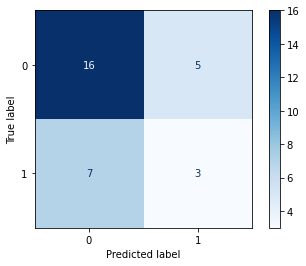

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues")